## Read in season stats so far (player per game) from stats.nba.com

In [1]:
import pandas as pd
df = pd.read_csv(r'player_stats_01-11-2021.csv')

In [2]:
df

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,Bradley Beal,WAS,27,9,2,7,36.0,35.0,12.1,...,5.0,4.6,3.6,1.3,0.7,2.4,50.3,1,0,-0.9
1,2,Kevin Durant,BKN,32,7,3,4,34.6,29.3,9.3,...,7.6,4.7,3.6,1.0,0.9,1.9,47.4,3,0,10.7
2,3,Stephen Curry,GSW,32,10,6,4,34.1,28.6,8.9,...,5.2,6.7,3.2,1.1,0.2,2.2,45.6,2,0,-1.2
3,4,CJ McCollum,POR,29,9,5,4,34.0,27.9,9.9,...,3.9,5.0,1.2,1.7,0.3,2.0,44.8,1,0,7.6
4,5,Zach LaVine,CHI,25,11,4,7,35.2,27.7,9.7,...,5.1,4.6,4.1,1.3,0.6,2.9,42.4,0,0,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,438,Theo Pinson,NYK,25,5,1,4,2.5,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0,0,-1.6
451,438,Torrey Craig,MIL,30,2,1,1,6.3,0.0,0.0,...,2.0,1.0,0.5,0.0,0.5,1.0,4.9,0,0,4.5
452,438,Ty-Shon Alexander,PHX,22,2,2,0,2.5,0.0,0.0,...,0.5,0.5,0.0,0.0,0.0,0.5,1.4,0,0,-5.5
453,438,Vernon Carey Jr.,CHA,19,1,1,0,3.7,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,5.7,0,0,-4.0


### drop the "Unnamed: 0" column

In [3]:
df.drop(df.columns[0], axis = 1, inplace = True)

### deal with name spelling differences in DraftKings Salaries (salaries) data and stats.nba.com (df) data

In [4]:
#merged = merged[merged['Name']!='Willy Hernangomez']

In [5]:
df.replace(to_replace = 'Robert Williams III', value = 'Robert Williams', inplace = True)

In [6]:
df.replace(to_replace = 'P.J. Washington', value = 'PJ Washington', inplace = True)

In [7]:
df.replace(to_replace = 'Maurice Harkless', value = 'Moe Harkless', inplace = True)

In [8]:
df[df['PLAYER']== 'Moe Harkless']

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
433,Moe Harkless,MIA,27,6,3,3,8.2,0.5,0.2,1.0,...,0.8,0.2,0.3,0.0,0.0,1.2,1.4,0,0,-5.5


# read in player box score stats from stats.nba.com

In [9]:
box_scores = pd.read_csv(r'player_box_scores_01-11-2021.csv')

In [10]:
box_scores.columns

Index(['Player', 'Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-'],
      dtype='object')

In [11]:
box_scores

,Player,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,Stephen Curry,GSW,GSW vs. TOR,1/10/2021,W,38,11,2,16,12.5,...,100,3,6,9,6,0,0,5,3,7
1,Draymond Green,GSW,GSW vs. TOR,1/10/2021,W,29,10,3,8,37.5,...,66.7,1,8,9,10,0,1,3,1,-3
2,Kelly Oubre Jr.,GSW,GSW vs. TOR,1/10/2021,W,29,12,5,14,35.7,...,100,3,3,6,3,0,1,1,1,-4
3,Kevon Looney,GSW,GSW vs. TOR,1/10/2021,W,14,2,1,1,100,...,-,2,1,3,0,0,1,0,0,5
4,Eric Paschall,GSW,GSW vs. TOR,1/10/2021,W,19,15,5,10,50,...,80,1,1,2,1,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Jarrett Allen,BKN,BKN vs. GSW,12/22/2020,W,20,8,2,3,66.7,...,80,3,4,7,2,1,2,2,0,6
3196,Timothe Luwawu-Cabarrot,BKN,BKN vs. GSW,12/22/2020,W,7,5,2,6,33.3,...,-,1,1,2,0,0,0,1,2,-9
3197,Taurean Prince,BKN,BKN vs. GSW,12/22/2020,W,16,1,0,1,0,...,50,0,1,1,0,1,1,0,1,-4
3198,Caris LeVert,BKN,BKN vs. GSW,12/22/2020,W,25,20,6,17,35.3,...,83.3,1,8,9,5,2,1,2,1,8


## Calculate DraftKings Fantasy Points

In [12]:
df['dkfp'] = df['PTS'] + df['3PM']*0.5 + df['REB']*1.25 + df['AST']*1.5 + df['STL']*2.0 + df['BLK']*2.0 - df['TOV']*0.5 + df['DD2']*1.5 + df['TD3']*3.0 

### get double doubles and triple doubles for box score fp

In [13]:
def doubledouble(df):
    df_index = []
    for i in list(range(len(df))):
        if (df.iloc[i]['PTS']>=10 and df.iloc[i]['REB']>=10) or (df.iloc[i]['PTS']>=10 and df.iloc[i]['AST']>=10) or (df.iloc[i]['PTS']>=10 and df.iloc[i]['STL']>=10) or (df.iloc[i]['PTS']>=10 and df.iloc[i]['BLK']>=10) or (df.iloc[i]['REB']>=10 and df.iloc[i]['AST']>=10) or (df.iloc[i]['REB']>=10 and df.iloc[i]['STL']>=10)or (df.iloc[i]['REB']>=10 and df.iloc[i]['BLK']>=10)or (df.iloc[i]['AST']>=10 and df.iloc[i]['STL']>=10)or (df.iloc[i]['AST']>=10 and df.iloc[i]['BLK']>=10):
            df_index.append(i)
    return df_index
            
doubledouble(box_scores)

[1,
 8,
 60,
 76,
 78,
 92,
 106,
 159,
 170,
 172,
 181,
 210,
 212,
 234,
 236,
 245,
 255,
 269,
 286,
 299,
 300,
 305,
 306,
 314,
 344,
 358,
 379,
 388,
 400,
 405,
 421,
 438,
 440,
 443,
 472,
 488,
 501,
 503,
 507,
 524,
 532,
 533,
 545,
 552,
 563,
 580,
 586,
 605,
 619,
 626,
 637,
 642,
 654,
 657,
 670,
 676,
 684,
 698,
 701,
 723,
 726,
 743,
 756,
 763,
 776,
 787,
 799,
 817,
 823,
 824,
 847,
 848,
 851,
 875,
 881,
 900,
 918,
 926,
 930,
 938,
 953,
 961,
 972,
 973,
 978,
 1009,
 1013,
 1014,
 1025,
 1037,
 1040,
 1073,
 1100,
 1105,
 1109,
 1110,
 1139,
 1153,
 1166,
 1174,
 1175,
 1191,
 1230,
 1239,
 1241,
 1243,
 1244,
 1247,
 1253,
 1258,
 1275,
 1282,
 1288,
 1293,
 1331,
 1342,
 1365,
 1376,
 1377,
 1381,
 1395,
 1396,
 1404,
 1408,
 1425,
 1436,
 1454,
 1470,
 1471,
 1522,
 1539,
 1548,
 1555,
 1569,
 1573,
 1581,
 1586,
 1595,
 1638,
 1652,
 1666,
 1676,
 1685,
 1687,
 1701,
 1707,
 1736,
 1739,
 1750,
 1776,
 1782,
 1803,
 1824,
 1829,
 1832,
 1845,
 

In [14]:
DD = [0]*len(box_scores)
for i in doubledouble(box_scores):
    DD[i]=1
box_scores['DD2'] = DD

In [15]:
def tripledouble(df):
    df_index = []
    for i in list(range(len(df))):
        if (df.iloc[i]['PTS']>=10 and df.iloc[i]['REB']>=10 and df.iloc[i]['AST']>=10)or (df.iloc[i]['PTS']>=10 and df.iloc[i]['REB']>=10 and df.iloc[i]['BLK']>=10)or (df.iloc[i]['PTS']>=10 and df.iloc[i]['REB']>=10 and df.iloc[i]['STL']>=10)or (df.iloc[i]['PTS']>=10 and df.iloc[i]['AST']>=10 and df.iloc[i]['STL']>=10) or (df.iloc[i]['PTS']>=10 and df.iloc[i]['AST']>=10 and df.iloc[i]['BLK']>=10) or (df.iloc[i]['PTS']>=10 and df.iloc[i]['STL']>=10 and df.iloc[i]['BLK']>=10)or (df.iloc[i]['REB']>=10 and df.iloc[i]['AST']>=10 and df.iloc[i]['STL']>=10)or (df.iloc[i]['REB']>=10 and df.iloc[i]['AST']>=10 and df.iloc[i]['BLK']>=10)or (df.iloc[i]['REB']>=10 and df.iloc[i]['STL']>=10 and df.iloc[i]['BLK']>=10)or (df.iloc[i]['AST']>=10 and df.iloc[i]['STL']>=10 and df.iloc[i]['BLK']>=10):
            df_index.append(i)
    return df_index
            
tripledouble(box_scores)

[212,
 299,
 823,
 1037,
 1230,
 1395,
 1581,
 1832,
 1948,
 2007,
 2058,
 2195,
 2252,
 2632,
 2636,
 2714,
 2906,
 3065]

In [16]:
TD = [0]*len(box_scores)
for i in tripledouble(box_scores):
    TD[i]=1
box_scores['TD3'] = TD

In [17]:
box_scores.iloc[tripledouble(box_scores)]

,Player,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,DD2,TD3
212,Luka Doncic,DAL,DAL vs. ORL,1/9/2021,W,35,20,7,20,35,...,10,11,10,1,2,6,1,-4,1,1
299,LaMelo Ball,CHA,CHA vs. ATL,1/9/2021,W,31,22,9,13,69.2,...,9,12,11,1,0,1,4,18,1,1
823,Steven Adams,NOP,NOP vs. OKC,1/6/2021,L,34,10,4,5,80,...,9,11,10,1,0,2,2,4,1,1
1037,Luka Doncic,DAL,DAL @ HOU,1/4/2021,W,38,33,12,25,48,...,14,16,11,0,0,8,3,28,1,1
1230,Nikola Jokic,DEN,DEN @ MIN,1/3/2021,W,32,19,8,12,66.7,...,9,12,12,0,0,7,5,27,1,1
1395,Ben Simmons,PHI,PHI vs. CHA,1/2/2021,W,37,15,6,9,66.7,...,11,12,11,1,1,4,4,11,1,1
1581,LeBron James,LAL,LAL @ SAS,1/1/2021,W,36,26,8,22,36.4,...,10,11,10,2,0,4,0,18,1,1
1832,Russell Westbrook,WAS,WAS vs. CHI,12/31/2020,L,39,22,8,18,44.4,...,8,10,11,1,0,5,4,-14,1,1
1948,Giannis Antetokounmpo,MIL,MIL @ MIA,12/30/2020,L,38,26,10,18,55.6,...,11,13,10,3,1,4,3,-5,1,1
2007,Julius Randle,NYK,NYK @ CLE,12/29/2020,W,44,28,9,16,56.3,...,11,12,11,1,0,9,4,3,1,1


In [18]:
box_scores['dkfp'] = box_scores['PTS'] + box_scores['3PM']*0.5 + box_scores['REB']*1.25 + box_scores['AST']*1.5 + box_scores['STL']*2.0 + box_scores['BLK']*2.0 - box_scores['TOV']*0.5 + box_scores['DD2']*1.5 + box_scores['TD3']*3.0 

## Get player by game stats

In [19]:
box_scores[box_scores['Player']== 'Chris Paul']

,Player,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,...,REB,AST,STL,BLK,TOV,PF,+/-,DD2,TD3,dkfp
314,Chris Paul,PHX,PHX @ IND,1/9/2021,W,33,15,6,10,60,...,2,10,0,0,1,4,2,1,0,33.50
500,Chris Paul,PHX,PHX @ DET,1/8/2021,L,38,11,5,11,45.5,...,7,9,0,0,2,5,-19,0,0,32.75
802,Chris Paul,PHX,PHX vs. TOR,1/6/2021,W,32,12,4,12,33.3,...,4,8,2,0,0,2,1,0,0,33.00
1361,Chris Paul,PHX,PHX vs. LAC,1/3/2021,L,36,15,6,12,50,...,9,6,1,1,2,3,-8,0,0,38.75
1531,Chris Paul,PHX,PHX @ DEN,1/1/2021,W,32,21,6,12,50,...,5,6,0,1,2,2,-5,0,0,37.75
1721,Chris Paul,PHX,PHX @ UTA,12/31/2020,W,30,11,4,13,30.8,...,4,8,0,0,3,2,6,0,0,27.50
2067,Chris Paul,PHX,PHX vs. NOP,12/29/2020,W,23,9,2,4,50,...,2,9,0,0,2,1,19,0,0,24.50
2428,Chris Paul,PHX,PHX @ SAC,12/27/2020,W,27,8,4,10,40,...,4,12,0,0,2,4,-7,0,0,30.00
2600,Chris Paul,PHX,PHX @ SAC,12/26/2020,L,33,22,8,19,42.1,...,5,12,2,1,0,4,-1,1,0,54.75
2922,Chris Paul,PHX,PHX vs. DAL,12/23/2020,W,28,8,3,9,33.3,...,4,5,2,0,3,3,-10,0,0,23.00


### Get descriptive statistics of draft kings fantasy points by player

In [20]:
player_group = box_scores.groupby('Player')['dkfp'].describe()

In [21]:
player_group

,count,mean,std,min,25%,50%,75%,max
Player,,,,,,,,
Aaron Gordon,9.0,28.750000,10.550474,11.50,23.7500,32.000,33.0000,44.75
Aaron Holiday,9.0,11.777778,5.391609,5.25,6.0000,12.000,16.5000,19.25
Aaron Nesmith,3.0,5.916667,5.490522,2.50,2.7500,3.000,7.6250,12.25
Adam Mokoka,5.0,5.500000,5.934539,-0.50,0.0000,5.750,8.7500,13.50
Al Horford,8.0,26.468750,8.051661,9.75,25.1250,26.875,29.5625,38.50
...,...,...,...,...,...,...,...,...
Xavier Tillman,4.0,13.937500,4.254287,10.25,11.5625,12.750,15.1250,20.00
Yuta Watanabe,5.0,9.450000,3.425091,4.75,8.7500,9.000,10.5000,14.25
Zach LaVine,11.0,44.454545,14.465830,23.25,34.2500,45.750,56.0000,66.75


# read in Hollinger player stats from espn.com

In [22]:
#hp[['PLAYER','USG','PER']] # columns of interest usage rate and player efficiency rating

In [23]:
hp = pd .read_csv(r'hollingerPlayer.csv')

In [24]:
hp[0:12]

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,1,"Ja Morant, MEM",3,27,0.623,21.3,7.8,37.8,2.5,6.6,4.5,31.61,24.9,0.8
1,2,"Nikola Jokic, DEN",10,35.1,0.671,31.4,13.6,30.6,9.3,27.5,18.7,30.23,102.8,3.4
2,3,"Chris Boucher, TOR",9,21.1,0.678,7.6,5.7,20.7,9.7,20.9,15,28.13,47.2,1.6
3,4,"Giannis Antetokounmpo, MIL",9,31.3,0.592,16.6,10.6,35,6.2,29,17.9,27.8,68.6,2.3
4,5,"Joel Embiid, PHI",8,32.3,0.649,12.8,12.3,28.1,6.1,30.7,19.2,27.27,64.2,2.1
5,NaN,"Nikola Vucevic, ORL",10,31.4,0.593,14.5,4,26.4,6.3,31.5,18.2,27.27,78.1,2.6
6,7,"Kyrie Irving, BKN",7,33,0.63,20.6,7.2,30.2,2.4,13.4,8.2,27.03,55.3,1.8
7,8,"Michael Porter Jr., DEN",4,29.3,0.69,10.7,3.1,21.3,5.2,21.3,13.5,26.74,28.4,0.9
8,9,"Karl-Anthony Towns, MIN",3,32.3,0.589,18.3,11.8,27.4,12.5,28,19.8,26.73,23.4,0.8
9,10,"CJ McCollum, POR",9,34,0.617,17.3,4.2,29.5,1,11.1,6,26.68,73.9,2.5


## Hollinger Player stats Data Cleaning

In [25]:
# drop these row indexes 
index_tobe_dropped = hp[hp['RK'] == 'RK'].index
# from dataFrame 
hp.drop(index_tobe_dropped, inplace = True) 

In [26]:
hp.reset_index(inplace = True)

In [27]:
hp[0:12] #extra header rows are now removed and index numbers are corrected

,index,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,0,1,"Ja Morant, MEM",3,27,0.623,21.3,7.8,37.8,2.5,6.6,4.5,31.61,24.9,0.8
1,1,2,"Nikola Jokic, DEN",10,35.1,0.671,31.4,13.6,30.6,9.3,27.5,18.7,30.23,102.8,3.4
2,2,3,"Chris Boucher, TOR",9,21.1,0.678,7.6,5.7,20.7,9.7,20.9,15,28.13,47.2,1.6
3,3,4,"Giannis Antetokounmpo, MIL",9,31.3,0.592,16.6,10.6,35,6.2,29,17.9,27.8,68.6,2.3
4,4,5,"Joel Embiid, PHI",8,32.3,0.649,12.8,12.3,28.1,6.1,30.7,19.2,27.27,64.2,2.1
5,5,NaN,"Nikola Vucevic, ORL",10,31.4,0.593,14.5,4,26.4,6.3,31.5,18.2,27.27,78.1,2.6
6,6,7,"Kyrie Irving, BKN",7,33,0.63,20.6,7.2,30.2,2.4,13.4,8.2,27.03,55.3,1.8
7,7,8,"Michael Porter Jr., DEN",4,29.3,0.69,10.7,3.1,21.3,5.2,21.3,13.5,26.74,28.4,0.9
8,8,9,"Karl-Anthony Towns, MIN",3,32.3,0.589,18.3,11.8,27.4,12.5,28,19.8,26.73,23.4,0.8
9,9,10,"CJ McCollum, POR",9,34,0.617,17.3,4.2,29.5,1,11.1,6,26.68,73.9,2.5


## edit player names, seperate from team name

In [28]:
player = hp['PLAYER']

In [29]:
splitted = player.str.split(',')

In [30]:
names = []
teams = []

In [31]:
for i in list(range(len(splitted))):
    names.append(splitted[i][0])

In [32]:
for i in list(range(len(splitted))):
    teams.append(splitted[i][1][1:])

In [33]:
hp['Name'] = names
hp['Team'] = teams

In [34]:
hp = hp[['RK', 'Name', 'Team', 'GP', 'MPG', 'USG', 'PER', 'TS%', 'AST', 'TO', 'ORR', 'DRR', 'REBR', 'VA', 'EWA']]

In [35]:
hp[hp['Name']=='P.J. Washington']

,RK,Name,Team,GP,MPG,USG,PER,TS%,AST,TO,ORR,DRR,REBR,VA,EWA
148,149,P.J. Washington,CHA,10,27.5,20.2,14.45,0.538,17.8,12.7,5.9,18,11.7,12.1,0.4


#### deal with name spelling differences in Salaries and hp

In [36]:
hp.replace(to_replace = 'Robert Williams III', value = 'Robert Williams', inplace = True)

In [37]:
hp.replace(to_replace = 'P.J. Washington', value = 'PJ Washington', inplace = True)

In [38]:
hp.replace(to_replace = 'Maurice Harkless', value = 'Moe Harkless', inplace = True)

In [39]:
hp[hp['Name']=='PJ Washington']

,RK,Name,Team,GP,MPG,USG,PER,TS%,AST,TO,ORR,DRR,REBR,VA,EWA
148,149,PJ Washington,CHA,10,27.5,20.2,14.45,0.538,17.8,12.7,5.9,18,11.7,12.1,0.4


# Merge Hollinger with traditional player stats

In [40]:
df.rename(columns = {'PLAYER': 'Name'}, inplace = True)

In [41]:
df = df[df['MIN']>6.09] # qualifier for hollinger player stats categories

In [42]:
merged1 = pd.merge(df, hp, how = 'outer', on = ['Name'])

In [43]:
merged1

,Name,TEAM,AGE,GP_x,W,L,MIN,PTS,FGM,FGA,...,USG,PER,TS%,AST_y,TO,ORR,DRR,REBR,VA,EWA
0,Bradley Beal,WAS,27,9,2,7,36.0,35.0,12.1,24.8,...,35.8,26.22,0.604,12.3,9.6,4.1,11.3,7.5,76,2.5
1,Kevin Durant,BKN,32,7,3,4,34.6,29.3,9.3,18.0,...,30.6,26.5,0.659,15.5,11.7,1.8,19.6,11.3,54.2,1.8
2,Stephen Curry,GSW,32,10,6,4,34.1,28.6,8.9,20.6,...,32.6,24.06,0.605,20,9.5,2.4,13.2,7.9,66.5,2.2
3,CJ McCollum,POR,29,9,5,4,34.0,27.9,9.9,21.0,...,29.5,26.68,0.617,17.3,4.2,1,11.1,6,73.9,2.5
4,Zach LaVine,CHI,25,11,4,7,35.2,27.7,9.7,19.8,...,30.6,20.95,0.622,14.9,13.2,0.9,14.8,8.1,60.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Cristiano Felicio,CHI,28,1,0,1,6.3,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,E'Twaun Moore,PHX,31,1,1,0,6.1,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,Kostas Antetokounmpo,LAL,23,1,1,0,7.7,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,Nico Mannion,GSW,19,1,1,0,7.8,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Load in DraftKings Salary csv

In [44]:
salaries = pd.read_csv(r'DKSalaries.csv')
salaries.drop(salaries.columns[[1,3]], axis = 1, inplace = True)
#salaries['points_per_dollar'] = salaries['AvgPointsPerGame']/salaries['Salary']
#salaries.sort_values('points_per_dollar', ascending = False, inplace = True)

In [45]:
salaries

,Position,Name,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame
0,PG,Luka Doncic,PG/G/UTIL,11300,Postponed,DAL,54.12
1,PF/C,Giannis Antetokounmpo,PF/C/F/UTIL,11000,MIL@ORL 01/11/2021 07:00PM ET,MIL,52.53
2,PG,Russell Westbrook,PG/G/UTIL,10300,PHO@WAS 01/11/2021 07:00PM ET,WAS,52.57
3,SG,Bradley Beal,SG/G/UTIL,9900,PHO@WAS 01/11/2021 07:00PM ET,WAS,51.69
4,C,Joel Embiid,C/UTIL,9800,PHI@ATL 01/11/2021 07:30PM ET,PHI,50.19
...,...,...,...,...,...,...,...
263,SG/SF,Edmond Sumner,SG/SF/F/G/UTIL,3000,IND@SAC 01/11/2021 10:00PM ET,IND,2.75
264,SF,Brian Bowen II,SF/F/UTIL,3000,IND@SAC 01/11/2021 10:00PM ET,IND,0.00
265,C,Goga Bitadze,C/UTIL,3000,IND@SAC 01/11/2021 10:00PM ET,IND,0.00
266,PG/SG,Jalen Lecque,PG/SG/G/UTIL,3000,IND@SAC 01/11/2021 10:00PM ET,IND,4.12


## merge salaries and player stats

In [46]:
merged = pd.merge(salaries, merged1, how = 'outer', on = ['Name'])

In [47]:
merged

,Position,Name,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame,TEAM,AGE,GP_x,...,USG,PER,TS%,AST_y,TO,ORR,DRR,REBR,VA,EWA
0,PG,Luka Doncic,PG/G/UTIL,11300.0,Postponed,DAL,54.12,DAL,21.0,8.0,...,37.8,24.69,0.554,22.4,12.2,2.5,27.4,15.1,55.6,1.9
1,PF/C,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL@ORL 01/11/2021 07:00PM ET,MIL,52.53,MIL,26.0,9.0,...,35,27.8,0.592,16.6,10.6,6.2,29,17.9,68.6,2.3
2,PG,Russell Westbrook,PG/G/UTIL,10300.0,PHO@WAS 01/11/2021 07:00PM ET,WAS,52.57,WAS,32.0,7.0,...,31.1,12.96,0.449,29.7,13.9,2.8,26.9,14.2,7.6,0.3
3,SG,Bradley Beal,SG/G/UTIL,9900.0,PHO@WAS 01/11/2021 07:00PM ET,WAS,51.69,WAS,27.0,9.0,...,35.8,26.22,0.604,12.3,9.6,4.1,11.3,7.5,76,2.5
4,C,Joel Embiid,C/UTIL,9800.0,PHI@ATL 01/11/2021 07:30PM ET,PHI,50.19,PHI,26.0,8.0,...,28.1,27.27,0.649,12.8,12.3,6.1,30.7,19.2,64.2,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,NaN,Willy Hernangomez,NaN,NaN,NaN,NaN,NaN,NOP,26.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,NaN,Moe Harkless,NaN,NaN,NaN,NaN,NaN,MIA,27.0,6.0,...,7.5,-4.87,0.218,10.1,20.2,0,10.2,5.6,-11.2,-0.4
455,NaN,Cristiano Felicio,NaN,NaN,NaN,NaN,NaN,CHI,28.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,NaN,Kostas Antetokounmpo,NaN,NaN,NaN,NaN,NaN,LAL,23.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
merged.columns

Index(['Position', 'Name', 'Roster Position', 'Salary', 'Game Info',
       'TeamAbbrev', 'AvgPointsPerGame', 'TEAM', 'AGE', 'GP_x', 'W', 'L',
       'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST_x', 'TOV', 'STL', 'BLK', 'PF', 'FP',
       'DD2', 'TD3', '+/-', 'dkfp', 'RK', 'Team', 'GP_y', 'MPG', 'USG', 'PER',
       'TS%', 'AST_y', 'TO', 'ORR', 'DRR', 'REBR', 'VA', 'EWA'],
      dtype='object')

In [49]:
selectdf = merged[['Name', 'Roster Position','Salary', 'TeamAbbrev', 'TEAM','Game Info','GP_x', 'dkfp', 'MIN','MPG', 'USG','PER']]

In [50]:
selectdf[selectdf['Name']=='Robert Williams']

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER
381,Robert Williams,NaN,NaN,NaN,BOS,NaN,8.0,21.825,16.3,16.4,14.4,26.27


# Start to Filter Data Removing Unwanted Players

## import injury report from rotowire.com and remove players listed as "out"

In [51]:
injured = pd.read_csv(r'nba-injury-report.csv')

injured = injured[injured['Team'].isin(teams)]

out = injured[injured['Status'] == 'Out']

out_list = list(out['Player'])

In [52]:
out_list

['Al-Farouq Aminu',
 'Trevor Ariza',
 'Goga Bitadze',
 'Bogdan Bogdanovic',
 'Brian Bowen',
 'Avery Bradley',
 'Jalen Brunson',
 'Reggie Bullock',
 'Alec Burks',
 'Michael Carter-Williams',
 'Nicolas Claxton',
 'Zach Collins',
 'Torrey Craig',
 'Seth Curry',
 'Matthew Dellavedova',
 'Kris Dunn',
 'Drew Eubanks',
 'Dante Exum',
 'Terrance Ferguson',
 'Dorian Finney-Smith',
 'Evan Fournier',
 'Danilo Gallinari',
 'Darius Garland',
 'Taj Gibson',
 'Tobias Harris',
 'Killian Hayes',
 'Danuel House',
 'Jaren Jackson',
 'DaQuan Jeffries',
 'John Konchar',
 'Furkan Korkmaz',
 'Jeremy Lamb',
 'Romeo Langford',
 'Jalen Lecque',
 'Kevin Love',
 'Patrick McCaw',
 'T.J. McConnell',
 'Shake Milton',
 'Ja Morant',
 'Frank Ntilikina',
 'Chuma Okeke',
 'Onyeka Okongwu',
 'Vincent Poirier',
 'Jontay Porter',
 'Michael Porter',
 'Kevin Porter',
 'Josh Richardson',
 'Rajon Rondo',
 'Jay Scrubb',
 'Ben Simmons',
 'Alen Smailagic',
 'Jayson Tatum',
 'Tristan Thompson',
 'Matisse Thybulle',
 'Killian Tillie

In [53]:
out_season = injured[injured['Status'] == 'Out For Season']
out_season = list(out_season['Player'])

In [54]:
out_season

['Marquese Chriss',
 'Chris Clemons',
 'Spencer Dinwiddie',
 'Markelle Fultz',
 'Jonathan Isaac',
 'Klay Thompson']

In [55]:
for i in out_season:
    out_list.append(i)

In [56]:
out_list

['Al-Farouq Aminu',
 'Trevor Ariza',
 'Goga Bitadze',
 'Bogdan Bogdanovic',
 'Brian Bowen',
 'Avery Bradley',
 'Jalen Brunson',
 'Reggie Bullock',
 'Alec Burks',
 'Michael Carter-Williams',
 'Nicolas Claxton',
 'Zach Collins',
 'Torrey Craig',
 'Seth Curry',
 'Matthew Dellavedova',
 'Kris Dunn',
 'Drew Eubanks',
 'Dante Exum',
 'Terrance Ferguson',
 'Dorian Finney-Smith',
 'Evan Fournier',
 'Danilo Gallinari',
 'Darius Garland',
 'Taj Gibson',
 'Tobias Harris',
 'Killian Hayes',
 'Danuel House',
 'Jaren Jackson',
 'DaQuan Jeffries',
 'John Konchar',
 'Furkan Korkmaz',
 'Jeremy Lamb',
 'Romeo Langford',
 'Jalen Lecque',
 'Kevin Love',
 'Patrick McCaw',
 'T.J. McConnell',
 'Shake Milton',
 'Ja Morant',
 'Frank Ntilikina',
 'Chuma Okeke',
 'Onyeka Okongwu',
 'Vincent Poirier',
 'Jontay Porter',
 'Michael Porter',
 'Kevin Porter',
 'Josh Richardson',
 'Rajon Rondo',
 'Jay Scrubb',
 'Ben Simmons',
 'Alen Smailagic',
 'Jayson Tatum',
 'Tristan Thompson',
 'Matisse Thybulle',
 'Killian Tillie

In [57]:
selectdf = selectdf[~selectdf['Name'].isin(out_list)]

In [58]:
selectdf[selectdf['Name']=='Robert Williams']

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER


## Teams playing today

In [59]:
steam = salaries['TeamAbbrev'].unique()

In [60]:
steam

array(['DAL', 'MIL', 'WAS', 'PHI', 'POR', 'NY', 'ATL', 'IND', 'CLE',
       'ORL', 'NO', 'TOR', 'CHA', 'PHO', 'SAC', 'MEM'], dtype=object)

In [61]:
selectdf['TEAM'].unique()

array(['DAL', 'MIL', 'WAS', 'PHI', 'POR', 'NYK', 'ATL', 'IND', 'CLE',
       'ORL', 'NOP', 'TOR', nan, 'CHA', 'PHX', 'SAC', 'MEM', 'BKN', 'GSW',
       'CHI', 'BOS', 'HOU', 'DET', 'LAC', 'DEN', 'LAL', 'UTA', 'SAS',
       'MIN', 'OKC', 'MIA'], dtype=object)

#### traditional player stats

In [62]:
selectdf['TEAM'].unique()

array(['DAL', 'MIL', 'WAS', 'PHI', 'POR', 'NYK', 'ATL', 'IND', 'CLE',
       'ORL', 'NOP', 'TOR', nan, 'CHA', 'PHX', 'SAC', 'MEM', 'BKN', 'GSW',
       'CHI', 'BOS', 'HOU', 'DET', 'LAC', 'DEN', 'LAL', 'UTA', 'SAS',
       'MIN', 'OKC', 'MIA'], dtype=object)

In [63]:
teams = ['NYK','CHA','MEM','CLE','MIL','ORL','PHX','WAS','PHI','ATL','TOR','POR','IND','SAC']

In [64]:
selectdf = selectdf[selectdf['TEAM'].isin(teams)]

In [65]:
selectdf['TEAM'].unique()

array(['MIL', 'WAS', 'PHI', 'POR', 'NYK', 'ATL', 'IND', 'CLE', 'ORL',
       'TOR', 'CHA', 'PHX', 'SAC', 'MEM'], dtype=object)

## get team leaders in minutes

In [66]:
df1 = selectdf.set_index('Name')

In [67]:
x = df1.groupby(['TEAM'])['MIN'].nlargest(10)

In [68]:
x['TOR']

Name
Kyle Lowry         36.5
Fred VanVleet      35.7
Pascal Siakam      35.7
OG Anunoby         34.8
Norman Powell      23.2
Chris Boucher      21.1
Aron Baynes        19.3
Terence Davis      12.6
Matt Thomas        12.3
Stanley Johnson    11.9
Name: MIN, dtype: float64

## get team leaders in dkfp

In [69]:
df2 = selectdf.set_index('Name')

In [70]:
y = df2.groupby(['TEAM'])['dkfp'].nlargest(10)

In [71]:
y['TOR']

Name
Pascal Siakam    44.275
Kyle Lowry       42.600
Fred VanVleet    42.200
Chris Boucher    32.450
OG Anunoby       26.400
Norman Powell    16.725
Aron Baynes      13.275
Terence Davis    12.325
Matt Thomas      11.325
Yuta Watanabe     9.450
Name: dkfp, dtype: float64

## Leaders dataframe with minutes and dkfp leaders by team

In [72]:
leaders = y.to_frame()

In [73]:
dkfp_leaders = leaders.reset_index().Name

In [74]:
merged_leaders = selectdf[selectdf['Name'].isin(dkfp_leaders)]

In [75]:
merged_leaders[merged_leaders['TEAM']=='MIL']

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8
17,Khris Middleton,SF/F/UTIL,8200.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,44.650,32.2,32.2,25.7,24.86
34,Jrue Holiday,PG/G/UTIL,6900.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,33.775,31.2,31.2,19.9,19.67
65,Bobby Portis,PF/C/F/UTIL,5800.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,32.325,24.2,24.2,17.6,18.73
75,Donte DiVincenzo,PG/SG/G/UTIL,5400.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,23.750,24.8,24.8,18.3,16.26
88,Brook Lopez,C/UTIL,4900.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,20.600,25.5,25.5,14.3,13.02
141,D.J. Augustin,PG/G/UTIL,3400.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,12.550,17.7,17.7,16.2,10.5
149,D.J. Wilson,PF/C/F/UTIL,3300.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,6.0,10.450,11.4,11.3,17.2,10.84
161,Pat Connaughton,SF/F/UTIL,3200.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,7.0,14.650,16.3,16.3,12.9,15.81
230,Jordan Nwora,SF/PF/F/UTIL,3000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,7.0,10.875,9.8,9.9,24.6,17.76


# clean na and get player value

In [76]:
merged_leaders[merged_leaders['PER'].isna()]

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER
132,Moritz Wagner,C/UTIL,3600.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,4.0,12.625,11.4,NaN,NaN,NaN
142,Garrison Mathews,SG/G/UTIL,3400.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,4.0,12.225,11.0,NaN,NaN,NaN
145,Tony Bradley,C/UTIL,3300.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,2.0,28.625,20.9,NaN,NaN,NaN
146,Paul Reed,PF/F/UTIL,3300.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,2.0,10.875,13.8,NaN,NaN,NaN
194,Dennis Smith Jr.,PG/G/UTIL,3000.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,2.0,10.250,12.0,NaN,NaN,NaN
223,Mo Bamba,C/UTIL,3000.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,3.0,9.375,7.2,NaN,NaN,NaN
224,James Ennis III,SF/F/UTIL,3000.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,3.0,12.075,18.9,NaN,NaN,NaN
245,Harry Giles III,C/UTIL,3000.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,6.0,9.000,7.9,NaN,NaN,NaN
248,Matt Thomas,SG/G/UTIL,3000.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,4.0,11.325,12.3,NaN,NaN,NaN


In [77]:
merged_leaders.fillna(0, inplace=True)

C:\Users\Win_N\Anaconda3\lib\site-packages\pandas\core\frame.py:4320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [78]:
import numpy as np
minutes = merged_leaders['MIN'].to_numpy(copy=True)
per = merged_leaders['PER'].to_numpy(copy=True)
usg = merged_leaders['USG'].to_numpy(copy=True)



In [79]:
per_fl = []
for i in per:
    per_fl.append(float(i))
per_arr = np.array(per_fl)

In [80]:
usg_fl = []
for i in usg:
    usg_fl.append(float(i))
usg_arr = np.array(usg_fl)

In [81]:
value = usg_arr + per_arr + minutes

## create a column 'value' to measure a players value for potential fantasy points

In [82]:
merged_leaders['value'] = value

C:\Users\Win_N\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### hollinger player stats

In [83]:
#hp['Team'].unique()

In [84]:
#hp_teams = ['HOU','IND','CLE','ORL','WSH','PHI','CHA','ATL','BOS','MIA','UTAH','NY','DET','MIL','OKC','NO','TOR','PHX','LAC','GS','CHI','SAC']

In [85]:
#hp = hp[hp['Team'].isin(hp_teams)]

In [86]:
#hp['Team'].unique()

In [87]:
merged_leaders[merged_leaders['Salary']<=3100]

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value
164,Grayson Allen,SG/G/UTIL,3100.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,8.0,13.025,20.2,20.1,13.8,8.39,42.39
170,Aron Baynes,C/UTIL,3100.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,7.0,13.275,19.3,19.3,15.3,5.32,39.92
173,Yuta Watanabe,SF/F/UTIL,3100.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,5.0,9.450,11.6,11.6,12.7,6.37,30.67
178,Bruno Fernando,C/UTIL,3000.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,6.0,9.650,10.8,10.8,11.5,8.76,31.06
182,Mike Scott,PF/F/UTIL,3000.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,5.0,8.850,16.0,16,12.4,5.06,33.46
190,Jalen McDaniels,PF/F/UTIL,3000.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,7.0,9.625,11.5,11.6,19,9.67,40.17
191,Cody Martin,SG/SF/F/G/UTIL,3000.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,8.0,9.175,12.8,12.9,12.3,11.14,36.24
194,Dennis Smith Jr.,PG/G/UTIL,3000.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,2.0,10.250,12.0,0,0,0,12.00
201,Thon Maker,PF/C/F/UTIL,3000.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,7.0,7.575,9.6,9.6,12.9,15.72,38.22
202,Lamar Stevens,SF/F/UTIL,3000.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,6.0,6.950,12.4,12.5,15.4,4.55,32.35


# Matchup check

In [88]:
matchup_check = merged_leaders.reset_index()

In [89]:
matchup_check[matchup_check['TEAM'].isin(['PHI', 'ATL'])]

,index,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value
3,4,Joel Embiid,C/UTIL,9800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,8.0,58.250,32.3,32.3,28.1,27.27,87.67
6,7,Trae Young,PG/G/UTIL,9400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,48.050,33.8,33.9,34.4,20.3,88.50
19,26,John Collins,PF/C/F/UTIL,7400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,38.300,28.5,28.6,21.5,21.65,71.65
25,32,Clint Capela,C/UTIL,7000.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,7.0,35.225,26.4,26.4,15.8,18.87,61.07
40,52,De'Andre Hunter,SF/PF/F/UTIL,6200.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,32.850,32.6,32.6,17.9,17.37,67.87
55,72,Kevin Huerter,SG/SF/F/G/UTIL,5500.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,26.400,27.5,27.4,19.2,14.52,61.22
63,83,Cam Reddish,SG/SF/F/G/UTIL,5100.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,22.450,29.0,29,19.7,8.32,57.02
69,90,Dwight Howard,C/UTIL,4800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,10.0,18.100,14.7,14.7,18.1,14.67,47.47
70,92,Tyrese Maxey,PG/G/UTIL,4700.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,10.0,17.500,18.5,18.5,22.8,15.32,56.62
71,93,Danny Green,SG/SF/F/G/UTIL,4700.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,10.0,19.825,25.8,25.8,15.1,10.57,51.47


## Load Hollinger Team Stats

In [90]:
#hollinger = pd.read_csv(r'hollingerTeam.csv')

### Teams playing today

In [91]:
#hollinger['TEAM']

In [92]:
teamsh = ['New York','Charlotte','Memphis','Cleveland','Milwaukee','Orlando','Phoenix','Washington','Philadelphia','Atlanta','Toronto','Portland','Indiana','Sacramento']

In [93]:
#teams

In [94]:
#hollinger = hollinger[hollinger['TEAM'].isin(teamsh)]

### offensive best first

In [95]:
hollingero = pd.read_csv(r'HollingerTeamStats_offense_01-11-2021.csv')
hollingero = hollingero[hollingero['TEAM'].isin(teamsh)]

In [96]:
hollingero

,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
0,1.0,Milwaukee,105.1,18.5,13.2,24.1,80.2,52.9,58.4,60.9,116.3,105.8
4,5.0,Phoenix,98.3,19.8,12.3,18.0,79.6,49.2,55.8,59.1,111.5,105.4
7,8.0,Indiana,102.3,19.1,12.0,18.3,79.1,49.1,55.8,58.5,110.6,106.7
8,9.0,Portland,104.8,16.5,10.1,17.5,79.4,48.1,53.3,57.0,110.3,110.2
9,NaN,Atlanta,103.0,17.7,13.0,26.5,78.0,52.4,52.1,56.7,110.3,108.4
10,11.0,Washington,108.8,18.7,12.0,18.5,79.2,47.2,54.3,57.8,109.8,113.0
15,16.0,Sacramento,103.7,17.4,12.0,23.0,79.7,49.7,51.9,55.5,107.8,115.0
16,17.0,Toronto,104.3,17.0,12.5,21.0,77.3,48.0,52.4,55.9,107.1,107.3
17,18.0,Philadelphia,105.4,18.3,15.1,21.7,78.1,51.8,54.6,57.9,106.8,103.3
20,21.0,Charlotte,102.9,20.4,13.7,22.6,75.8,48.3,52.0,55.3,105.6,106.2


### defensive best first

In [97]:
hollingerd = pd.read_csv(r'HollingerTeamStats_defense_01-11-2021.csv')
hollingerd = hollingerd[hollingerd['TEAM'].isin(teamsh)]

In [98]:
hollingerd

,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
0,1.0,Cleveland,99.5,17.7,14.4,23.9,74.7,48.7,50.2,52.5,99.7,100.9
1,2.0,Philadelphia,105.4,18.3,15.1,21.7,78.1,51.8,54.6,57.9,106.8,103.3
6,7.0,Phoenix,98.3,19.8,12.3,18.0,79.6,49.2,55.8,59.1,111.5,105.4
7,8.0,New York,99.5,17.0,14.3,22.0,77.3,50.2,50.5,53.9,101.6,105.8
8,NaN,Memphis,103.0,18.2,13.2,22.5,79.0,50.2,50.1,53.0,101.3,105.8
10,NaN,Milwaukee,105.1,18.5,13.2,24.1,80.2,52.9,58.4,60.9,116.3,105.8
12,13.0,Charlotte,102.9,20.4,13.7,22.6,75.8,48.3,52.0,55.3,105.6,106.2
13,14.0,Indiana,102.3,19.1,12.0,18.3,79.1,49.1,55.8,58.5,110.6,106.7
14,15.0,Orlando,102.3,15.4,11.4,23.5,80.7,50.6,48.9,52.9,104.3,106.8
17,18.0,Toronto,104.3,17.0,12.5,21.0,77.3,48.0,52.4,55.9,107.1,107.3


### Pace

In [99]:
hollingerp = pd.read_csv(r'HollingerTeamStats_pace_01-11-2021.csv')
hollingerp = hollingerp[hollingerp['TEAM'].isin(teamsh)]

In [100]:
hollingerp

,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
0,1.0,Washington,108.8,18.7,12.0,18.5,79.2,47.2,54.3,57.8,109.8,113.0
4,5.0,Philadelphia,105.4,18.3,15.1,21.7,78.1,51.8,54.6,57.9,106.8,103.3
5,6.0,Milwaukee,105.1,18.5,13.2,24.1,80.2,52.9,58.4,60.9,116.3,105.8
6,7.0,Portland,104.8,16.5,10.1,17.5,79.4,48.1,53.3,57.0,110.3,110.2
7,8.0,Toronto,104.3,17.0,12.5,21.0,77.3,48.0,52.4,55.9,107.1,107.3
9,10.0,Sacramento,103.7,17.4,12.0,23.0,79.7,49.7,51.9,55.5,107.8,115.0
11,12.0,Atlanta,103.0,17.7,13.0,26.5,78.0,52.4,52.1,56.7,110.3,108.4
12,NaN,Memphis,103.0,18.2,13.2,22.5,79.0,50.2,50.1,53.0,101.3,105.8
14,NaN,Charlotte,102.9,20.4,13.7,22.6,75.8,48.3,52.0,55.3,105.6,106.2
19,20.0,Indiana,102.3,19.1,12.0,18.3,79.1,49.1,55.8,58.5,110.6,106.7


# Lineup optimizer algorithm

# Prepare for optimization

In [101]:
d = merged_leaders.sort_values('dkfp', ascending = False)

In [102]:
d['value_per_dollar'] = d['value']/d['Salary']

In [103]:
d['points_per_dollar'] = d['dkfp']/d['Salary']

In [104]:
d = d[d['GP_x']>3]

In [105]:
d = d[d['MIN'] >= 15]

In [106]:
d = d[d['dkfp'] >= 15]

In [107]:
d[d['Salary']==0]

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar


In [108]:
d

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Derrick Jones Jr.,SF/PF/F/UTIL,3800.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,16.450,28.2,28.2,11,7.68,46.88,0.012337,0.004329
127,Desmond Bane,PG/SG/G/UTIL,3700.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,16.125,23.1,23.1,15.3,10.16,48.56,0.013124,0.004358
136,Gary Trent Jr.,SG/SF/F/G/UTIL,3500.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,7.0,16.075,23.4,23.4,17.6,11.09,52.09,0.014883,0.004593
128,Dwayne Bacon,SF/F/UTIL,3700.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,10.0,15.300,24.9,24.9,16.5,8.43,49.83,0.013468,0.004135


In [109]:
d1 = d.sort_values('value_per_dollar', ascending = False)

In [110]:
d1

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
123,JaVale McGee,C/UTIL,3800.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,21.100,17.0,17,24.4,19.2,60.60,0.015947,0.005553
129,Dario Saric,PF/C/F/UTIL,3700.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,6.0,18.325,18.5,18.5,25.3,12.63,56.43,0.015251,0.004953
107,Cameron Johnson,SF/PF/F/UTIL,4200.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,22.575,23.6,23.6,19.5,19.44,62.54,0.014890,0.005375
136,Gary Trent Jr.,SG/SF/F/G/UTIL,3500.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,7.0,16.075,23.4,23.4,17.6,11.09,52.09,0.014883,0.004593
117,Cameron Payne,PG/G/UTIL,4000.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,9.0,18.600,17.8,17.8,21.7,16.98,56.48,0.014120,0.004650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Joel Embiid,C/UTIL,9800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,8.0,58.250,32.3,32.3,28.1,27.27,87.67,0.008946,0.005944
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
32,Clint Capela,C/UTIL,7000.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,7.0,35.225,26.4,26.4,15.8,18.87,61.07,0.008724,0.005032
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623


In [111]:
d2 = d.sort_values('points_per_dollar', ascending = False)

In [112]:
d2[0:25]

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
28,Jonas Valanciunas,C/UTIL,7200.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,44.950,26.7,26.8,22.5,18.81,68.01,0.009446,0.006243
11,Nikola Vucevic,C/UTIL,8900.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,10.0,55.275,31.4,31.4,26.4,27.27,85.07,0.009558,0.006211
84,Enes Kanter,C/UTIL,5100.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,30.525,19.5,19.4,18.2,26.33,64.03,0.012555,0.005985
4,Joel Embiid,C/UTIL,9800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,8.0,58.250,32.3,32.3,28.1,27.27,87.67,0.008946,0.005944
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
65,Bobby Portis,PF/C/F/UTIL,5800.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,32.325,24.2,24.2,17.6,18.73,60.53,0.010436,0.005573


In [113]:
#d2.to_csv('testdf.csv')

In [114]:
#d[d['Name']=='Bobby Portis']

In [115]:
#d[d['Name']=='Nicolas Batum']

## optimize

In [116]:
n = 89
W = 50000
maxplayers = 8
p = list(d2['dkfp'])
w = list(d2['Salary'])
p_per_weight = list(d2['points_per_dollar'])

class Priority_Queue:
    def __init__(self):
        self.pqueue = []
        self.length = 0
    
    def insert(self, node):
        for i in self.pqueue:
            get_bound(i)
        i = 0
        while i < len(self.pqueue):
            if self.pqueue[i].bound > node.bound:
                break
            i+=1
        self.pqueue.insert(i,node)
        self.length += 1

    def print_pqueue(self):
        for i in list(range(len(self.pqueue))):
            print ("pqueue",i, "=", self.pqueue[i].bound)
                    
    def remove(self):
        try:
            result = self.pqueue.pop()
            self.length -= 1
        except: 
            print("Priority queue is empty, cannot pop from empty list.")
        else:
            return result
        
class Node:
    def __init__(self, level, profit, weight):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.items = []
        self.numplayers = 0

        
            
def get_bound(node):
    if node.weight >= W:
        return 0
    if node.numplayers >= maxplayers:
        return 0

    else:
        result = node.profit
        j = node.level + 1
        totweight = node.weight
        while j <= n-1 and totweight + w[j] <= W:
            totweight = totweight + w[j]
            result = result + p[j]
            j+=1
        k = j
        if k<=n-1:
            result = result + (W - totweight) * p_per_weight[k]
        return result


nodes_generated = 0
pq = Priority_Queue()

v = Node(-1, 0, 0) # v initialized to be the root with level = 0, profit = $0, weight = 0
nodes_generated+=1
maxprofit = 0 # maxprofit initialized to $0
v.bound = get_bound(v)
#print("v.bound = ", v.bound)
v.numplayers = 0
lineups = []
bestitems = []
pq.insert(v)


while pq.length != 0:
    
    v = pq.remove() #remove node with best bound
    #print("\nNode removed from pq.")
    #print("Priority Queue: ") 
    #pq.print_pqueue()
    
    #print("\nmaxprofit = ", maxprofit)
    #print("Parent Node: ")
    #print("v.level = ", v.level, "v.profit = ", v.profit, "v.weight = ", v.weight, "v.bound = ", v.bound, "v.items = ", v.items)

    if v.bound > maxprofit: #check if node is still promising
        #set u to the child that includes the next item
        u = Node(-1, 0, 0)
        nodes_generated+=1
        u.level = v.level + 1
        u.profit = v.profit + p[u.level]
        u.weight = v.weight + w[u.level]
        #take v's list and add u's list
        u.items = v.items.copy()
        u.items.append(u.level) # adds next item
        u.numplayers = len(u.items)
        #print("child that includes the next item: ")
        #print("Child 1:")
        #print("u.level = ", u.level, "u.profit = ", u.profit, "u.weight = ", u.weight)
        #print("u.items = ", u.items)
        if u.weight <= W and u.profit > maxprofit: 
            #update maxprofit
            maxprofit = u.profit
            #print("\nmaxprofit updated = ", maxprofit)
            bestitems = u.items
            lineups.append(bestitems)
            #print("bestitems = ", bestitems)
        u.bound = get_bound(u)
        #print("u.bound = ", u.bound)
        if u.bound > maxprofit:
            pq.insert(u)
            #print("Node u1 inserted into pq.")
            #print("Priority Queue : ") 
            #pq.print_pqueue()
        #set u to the child that does not include the next item
        u2 = Node(u.level, v.profit, v.weight)
        nodes_generated+=1
        u2.bound = get_bound(u2)
        u2.items = v.items.copy()
        u2.numplayers = len(u2.items)
        #print("child that doesn't include the next item: ")
        #print("Child 2:")
        #print("u2.level = ", u2.level, "u2.profit = ", u2.profit, "u2.weight = ", u2.weight, "u2.bound = ", u2.bound)
        #print("u2.items = ", u2.items)
        if u2.bound > maxprofit:
            pq.insert(u2)
            #print("Node u2 inserted into pq.")
            #print("Priority Queue : ") 
            #pq.print_pqueue()


    
print("\nEND maxprofit = ", maxprofit, "nodes generated = ", nodes_generated)
print("bestitems = ", bestitems)


END maxprofit =  326.79999999999995 nodes generated =  627
bestitems =  [0, 1, 2, 3, 4, 21]


In [117]:
bestitems =  [0, 1, 2, 3, 4, 21]

In [118]:
lineup = d2.iloc[bestitems]

In [119]:
lineup['Salary'].sum()

49800.0

In [120]:
lineup

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
28,Jonas Valanciunas,C/UTIL,7200.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,44.950,26.7,26.8,22.5,18.81,68.01,0.009446,0.006243
107,Cameron Johnson,SF/PF/F/UTIL,4200.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,22.575,23.6,23.6,19.5,19.44,62.54,0.014890,0.005375


In [121]:
mylineup = ['Caris LeVert', 'Cole Anthony', 'Jaylen Brown', 'Julius Randle', 'Daniel Theis', 'Joe Harris', 'Cameron Johnson', 'Bobby Portis']

In [122]:
myroster = d[d['Name'].isin(mylineup)]

In [123]:
myroster['dkfp'].sum()

139.02499999999998

In [124]:
myroster

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
65,Bobby Portis,PF/C/F/UTIL,5800.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,32.325,24.2,24.2,17.6,18.73,60.53,0.010436,0.005573
107,Cameron Johnson,SF/PF/F/UTIL,4200.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,22.575,23.6,23.6,19.5,19.44,62.54,0.014890,0.005375
70,Cole Anthony,PG/SG/G/UTIL,5600.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,10.0,20.425,23.3,23.3,23.6,9.6,56.50,0.010089,0.003647


# positional analysis

In [125]:
positional = d2.set_index(['Name'])

In [126]:
pos = positional['Roster Position']

splitted = pos.str.split('/')

pg = []
sg = []
sf = []
pf = []
c = []
g = []
f = []
util = []
for i in list(range(len(splitted))):
    if 'PG' in splitted[i]:
        pg.append(splitted.index[i])
    if 'SG' in splitted[i]:
        sg.append(splitted.index[i])
    if 'SF' in splitted[i]:
        sf.append(splitted.index[i])
    if 'PF' in splitted[i]:
        pf.append(splitted.index[i])
    if 'C' in splitted[i]:
        c.append(splitted.index[i])
    if 'G' in splitted[i]:
        g.append(splitted.index[i])
    if 'F' in splitted[i]:
        f.append(splitted.index[i])
    if 'UTIL' in splitted[i]:
        util.append(splitted.index[i])


### Point Guards

In [127]:
p1 = d[d['Name'].isin(pg)]
p1

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
7,Trae Young,PG/G/UTIL,9400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,48.050,33.8,33.9,34.4,20.3,88.50,0.009415,0.005112
12,CJ McCollum,PG/SG/G/UTIL,8800.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,47.625,34.0,34,29.5,26.68,90.18,0.010248,0.005412
15,Malcolm Brogdon,PG/G/UTIL,8300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,45.575,37.4,37.4,24.8,23.37,85.57,0.010310,0.005491
5,Damian Lillard,PG/G/UTIL,9700.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,45.075,34.5,34.4,30.3,23.98,88.78,0.009153,0.004647
18,Kyle Lowry,PG/G/UTIL,8200.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,8.0,42.600,36.5,36.5,23.5,16.87,76.87,0.009374,0.005195
14,Fred VanVleet,PG/SG/G/UTIL,8500.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,9.0,42.200,35.7,35.7,24.6,21.42,81.72,0.009614,0.004965
33,LaMelo Ball,PG/G/UTIL,7000.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,38.875,24.9,24.9,25.7,19.98,70.58,0.010083,0.005554
36,Collin Sexton,PG/SG/G/UTIL,6800.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,8.0,36.325,37.3,37.4,26.1,20.07,83.47,0.012275,0.005342
29,Chris Paul,PG/G/UTIL,7200.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,36.250,31.2,31.2,22.8,17.56,71.56,0.009939,0.005035


In [128]:
#p1.sort_values('dkfp', ascending = False)
p1.sort_values('points_per_dollar', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
33,LaMelo Ball,PG/G/UTIL,7000.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,38.875,24.9,24.9,25.7,19.98,70.58,0.010083,0.005554
15,Malcolm Brogdon,PG/G/UTIL,8300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,45.575,37.4,37.4,24.8,23.37,85.57,0.010310,0.005491
64,Devonte' Graham,PG/G/UTIL,5800.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,31.550,32.2,32.3,20.3,10.3,62.80,0.010828,0.005440
12,CJ McCollum,PG/SG/G/UTIL,8800.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,47.625,34.0,34,29.5,26.68,90.18,0.010248,0.005412
36,Collin Sexton,PG/SG/G/UTIL,6800.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,8.0,36.325,37.3,37.4,26.1,20.07,83.47,0.012275,0.005342
124,De'Anthony Melton,PG/SG/G/UTIL,3800.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,4.0,19.800,20.9,21,18.7,12.41,52.01,0.013687,0.005211
18,Kyle Lowry,PG/G/UTIL,8200.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,8.0,42.600,36.5,36.5,23.5,16.87,76.87,0.009374,0.005195
43,Terry Rozier,PG/SG/G/UTIL,6500.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,33.725,31.9,31.9,24.3,18.32,74.52,0.011465,0.005188
7,Trae Young,PG/G/UTIL,9400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,48.050,33.8,33.9,34.4,20.3,88.50,0.009415,0.005112


### SG

In [129]:
p2 = d[d['Name'].isin(sg)]

In [130]:
p2#.sort_values('points_per_dollar', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
3,Bradley Beal,SG/G/UTIL,9900.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,9.0,53.050,36.0,36,35.8,26.22,98.02,0.009901,0.005359
12,CJ McCollum,PG/SG/G/UTIL,8800.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,47.625,34.0,34,29.5,26.68,90.18,0.010248,0.005412
14,Fred VanVleet,PG/SG/G/UTIL,8500.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,9.0,42.200,35.7,35.7,24.6,21.42,81.72,0.009614,0.004965
35,Victor Oladipo,SG/SF/F/G/UTIL,6900.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,8.0,37.150,32.8,32.8,26.6,16.69,76.09,0.011028,0.005384
36,Collin Sexton,PG/SG/G/UTIL,6800.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,8.0,36.325,37.3,37.4,26.1,20.07,83.47,0.012275,0.005342
21,Devin Booker,SG/G/UTIL,7900.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,34.925,35.7,35.7,28.7,15.25,79.65,0.010082,0.004421
30,RJ Barrett,SG/SF/F/G/UTIL,7100.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,34.200,38.2,38.2,23,10.68,71.88,0.010124,0.004817
43,Terry Rozier,PG/SG/G/UTIL,6500.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,33.725,31.9,31.9,24.3,18.32,74.52,0.011465,0.005188
50,Dillon Brooks,SG/SF/F/G/UTIL,6300.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,30.425,30.0,30,28.2,12.04,70.24,0.011149,0.004829
53,Tyrese Haliburton,PG/SG/G/UTIL,6200.0,SAC,SAC,IND@SAC 01/11/2021 10:00PM ET,8.0,28.100,28.6,28.6,16.2,20.31,65.11,0.010502,0.004532


In [131]:
#SF
p3 = d[d['Name'].isin(sf)]

In [132]:
p3.sort_values('dkfp', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
17,Khris Middleton,SF/F/UTIL,8200.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,44.650,32.2,32.2,25.7,24.86,82.76,0.010093,0.005445
20,Gordon Hayward,SF/PF/F/UTIL,7900.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,37.850,34.8,34.8,24.9,18.06,77.76,0.009843,0.004791
35,Victor Oladipo,SG/SF/F/G/UTIL,6900.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,8.0,37.150,32.8,32.8,26.6,16.69,76.09,0.011028,0.005384
30,RJ Barrett,SG/SF/F/G/UTIL,7100.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,34.200,38.2,38.2,23,10.68,71.88,0.010124,0.004817
41,Kyle Anderson,SF/PF/F/UTIL,6600.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,33.600,30.4,30.4,22.5,12.97,65.87,0.009980,0.005091
45,Harrison Barnes,SF/PF/F/UTIL,6500.0,SAC,SAC,IND@SAC 01/11/2021 10:00PM ET,10.0,33.550,34.4,34.4,18.5,17.34,70.24,0.010806,0.005162
52,De'Andre Hunter,SF/PF/F/UTIL,6200.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,32.850,32.6,32.6,17.9,17.37,67.87,0.010947,0.005298
50,Dillon Brooks,SG/SF/F/G/UTIL,6300.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,30.425,30.0,30,28.2,12.04,70.24,0.011149,0.004829
57,Mikal Bridges,SF/F/UTIL,6100.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,28.800,33.5,33.5,15.3,18.01,66.81,0.010952,0.004721
48,Buddy Hield,SG/SF/F/G/UTIL,6400.0,SAC,SAC,IND@SAC 01/11/2021 10:00PM ET,10.0,26.450,34.3,34.3,20.3,7.9,62.50,0.009766,0.004133


In [133]:
#PF
p4 = d[d['Name'].isin(pf)]
p4

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
19,Pascal Siakam,PF/F/UTIL,8100.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,8.0,44.275,35.7,35.8,25.1,16.82,77.62,0.009583,0.005466
26,John Collins,PF/C/F/UTIL,7400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,38.300,28.5,28.6,21.5,21.65,71.65,0.009682,0.005176
20,Gordon Hayward,SF/PF/F/UTIL,7900.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,37.850,34.8,34.8,24.9,18.06,77.76,0.009843,0.004791
41,Kyle Anderson,SF/PF/F/UTIL,6600.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,33.600,30.4,30.4,22.5,12.97,65.87,0.009980,0.005091
45,Harrison Barnes,SF/PF/F/UTIL,6500.0,SAC,SAC,IND@SAC 01/11/2021 10:00PM ET,10.0,33.550,34.4,34.4,18.5,17.34,70.24,0.010806,0.005162
52,De'Andre Hunter,SF/PF/F/UTIL,6200.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,32.850,32.6,32.6,17.9,17.37,67.87,0.010947,0.005298
60,Chris Boucher,PF/C/F/UTIL,6000.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,9.0,32.450,21.1,21.1,20.7,28.13,69.93,0.011655,0.005408


In [134]:
#C
p5 = d[d['Name'].isin(c)]
p5

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
4,Joel Embiid,C/UTIL,9800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,8.0,58.250,32.3,32.3,28.1,27.27,87.67,0.008946,0.005944
11,Nikola Vucevic,C/UTIL,8900.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,10.0,55.275,31.4,31.4,26.4,27.27,85.07,0.009558,0.006211
28,Jonas Valanciunas,C/UTIL,7200.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,9.0,44.950,26.7,26.8,22.5,18.81,68.01,0.009446,0.006243
27,Deandre Ayton,C/UTIL,7300.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,39.675,30.7,30.7,17.7,17.68,66.08,0.009052,0.005435
26,John Collins,PF/C/F/UTIL,7400.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,38.300,28.5,28.6,21.5,21.65,71.65,0.009682,0.005176
32,Clint Capela,C/UTIL,7000.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,7.0,35.225,26.4,26.4,15.8,18.87,61.07,0.008724,0.005032


In [135]:
#G
p6 = d[d['Name'].isin(g)]
p6.sort_values('points_per_dollar', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
2,Russell Westbrook,PG/G/UTIL,10300.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,7.0,70.625,37.1,37.1,31.1,12.96,81.16,0.007880,0.006857
33,LaMelo Ball,PG/G/UTIL,7000.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,38.875,24.9,24.9,25.7,19.98,70.58,0.010083,0.005554
15,Malcolm Brogdon,PG/G/UTIL,8300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,45.575,37.4,37.4,24.8,23.37,85.57,0.010310,0.005491
64,Devonte' Graham,PG/G/UTIL,5800.0,CHA,CHA,NY@CHA 01/11/2021 07:00PM ET,10.0,31.550,32.2,32.3,20.3,10.3,62.80,0.010828,0.005440
12,CJ McCollum,PG/SG/G/UTIL,8800.0,POR,POR,TOR@POR 01/11/2021 10:00PM ET,9.0,47.625,34.0,34,29.5,26.68,90.18,0.010248,0.005412
35,Victor Oladipo,SG/SF/F/G/UTIL,6900.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,8.0,37.150,32.8,32.8,26.6,16.69,76.09,0.011028,0.005384
3,Bradley Beal,SG/G/UTIL,9900.0,WAS,WAS,PHO@WAS 01/11/2021 07:00PM ET,9.0,53.050,36.0,36,35.8,26.22,98.02,0.009901,0.005359
36,Collin Sexton,PG/SG/G/UTIL,6800.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,8.0,36.325,37.3,37.4,26.1,20.07,83.47,0.012275,0.005342
124,De'Anthony Melton,PG/SG/G/UTIL,3800.0,MEM,MEM,MEM@CLE 01/11/2021 07:00PM ET,4.0,19.800,20.9,21,18.7,12.41,52.01,0.013687,0.005211
18,Kyle Lowry,PG/G/UTIL,8200.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,8.0,42.600,36.5,36.5,23.5,16.87,76.87,0.009374,0.005195


In [136]:
#F
p7 = d[d['Name'].isin(f)]
p7.sort_values('points_per_dollar', ascending = False)
#less_than = p7[p7['Salary']<=4500]
#less_than.sort_values('points_per_dollar', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
65,Bobby Portis,PF/C/F/UTIL,5800.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,32.325,24.2,24.2,17.6,18.73,60.53,0.010436,0.005573
19,Pascal Siakam,PF/F/UTIL,8100.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,8.0,44.275,35.7,35.8,25.1,16.82,77.62,0.009583,0.005466
17,Khris Middleton,SF/F/UTIL,8200.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,10.0,44.650,32.2,32.2,25.7,24.86,82.76,0.010093,0.005445
60,Chris Boucher,PF/C/F/UTIL,6000.0,TOR,TOR,TOR@POR 01/11/2021 10:00PM ET,9.0,32.450,21.1,21.1,20.7,28.13,69.93,0.011655,0.005408
35,Victor Oladipo,SG/SF/F/G/UTIL,6900.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,8.0,37.150,32.8,32.8,26.6,16.69,76.09,0.011028,0.005384
107,Cameron Johnson,SF/PF/F/UTIL,4200.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,22.575,23.6,23.6,19.5,19.44,62.54,0.014890,0.005375
52,De'Andre Hunter,SF/PF/F/UTIL,6200.0,ATL,ATL,PHI@ATL 01/11/2021 07:30PM ET,9.0,32.850,32.6,32.6,17.9,17.37,67.87,0.010947,0.005298


In [137]:
#UTIL
p8 = d[d['Name'].isin(util)]
p8
less_than = p8[p8['Salary']<=3100]
#less_than.sort_values('dkfp', ascending = False)
#utility_check = p8.sort_values('AvgPointsPerGame', ascending = False)
#utility_check[utility_check['AvgPointsPerGame']>20]
less_than

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar


In [138]:
p5.sort_values('MIN', ascending = False)

,Name,Roster Position,Salary,TeamAbbrev,TEAM,Game Info,GP_x,dkfp,MIN,MPG,USG,PER,value,value_per_dollar,points_per_dollar
6,Julius Randle,PF/C/F/UTIL,9600.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,63.700,37.8,37.8,28.7,20.36,86.86,0.009048,0.006635
8,Domantas Sabonis,PF/C/F/UTIL,9300.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,64.250,37.7,37.7,24.8,20.93,83.43,0.008971,0.006909
31,Larry Nance Jr.,PF/C/F/UTIL,7100.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,31.450,35.0,35,13.8,15.27,64.07,0.009024,0.004430
4,Joel Embiid,C/UTIL,9800.0,PHI,PHI,PHI@ATL 01/11/2021 07:30PM ET,8.0,58.250,32.3,32.3,28.1,27.27,87.67,0.008946,0.005944
11,Nikola Vucevic,C/UTIL,8900.0,ORL,ORL,MIL@ORL 01/11/2021 07:00PM ET,10.0,55.275,31.4,31.4,26.4,27.27,85.07,0.009558,0.006211
1,Giannis Antetokounmpo,PF/C/F/UTIL,11000.0,MIL,MIL,MIL@ORL 01/11/2021 07:00PM ET,9.0,61.850,31.4,31.3,35,27.8,94.20,0.008564,0.005623
9,Andre Drummond,C/UTIL,9200.0,CLE,CLE,MEM@CLE 01/11/2021 07:00PM ET,10.0,60.700,31.3,31.3,31,19.69,81.99,0.008912,0.006598
27,Deandre Ayton,C/UTIL,7300.0,PHO,PHX,PHO@WAS 01/11/2021 07:00PM ET,10.0,39.675,30.7,30.7,17.7,17.68,66.08,0.009052,0.005435
54,Myles Turner,C/UTIL,6200.0,IND,IND,IND@SAC 01/11/2021 10:00PM ET,9.0,33.800,30.0,30,15.6,18.91,64.51,0.010405,0.005452
73,Mitchell Robinson,C/UTIL,5500.0,NY,NYK,NY@CHA 01/11/2021 07:00PM ET,10.0,25.500,29.8,29.8,10.6,17.66,58.06,0.010556,0.004636


# Visualization

#### PG

In [139]:
data = player_group.reset_index()
data

,Player,count,mean,std,min,25%,50%,75%,max
0,Aaron Gordon,9.0,28.750000,10.550474,11.50,23.7500,32.000,33.0000,44.75
1,Aaron Holiday,9.0,11.777778,5.391609,5.25,6.0000,12.000,16.5000,19.25
2,Aaron Nesmith,3.0,5.916667,5.490522,2.50,2.7500,3.000,7.6250,12.25
3,Adam Mokoka,5.0,5.500000,5.934539,-0.50,0.0000,5.750,8.7500,13.50
4,Al Horford,8.0,26.468750,8.051661,9.75,25.1250,26.875,29.5625,38.50
...,...,...,...,...,...,...,...,...,...
450,Xavier Tillman,4.0,13.937500,4.254287,10.25,11.5625,12.750,15.1250,20.00
451,Yuta Watanabe,5.0,9.450000,3.425091,4.75,8.7500,9.000,10.5000,14.25
452,Zach LaVine,11.0,44.454545,14.465830,23.25,34.2500,45.750,56.0000,66.75
453,Zeke Nnaji,5.0,0.900000,1.420827,0.00,0.0000,0.000,1.2500,3.25


In [140]:
pg_data = data[data['Player'].isin(pg)][['Player','mean','min','max']]

In [141]:
pg_data_sorted = pg_data.sort_values('mean')

In [142]:
import matplotlib.pylab as plt

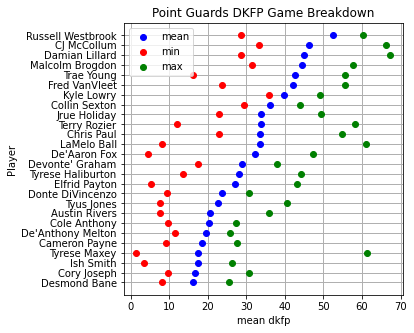

In [143]:
plt.plot(pg_data_sorted['mean'],pg_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Point Guards DKFP Game Breakdown')
plt.plot(pg_data_sorted['min'],pg_data_sorted['Player'], 'ro')
plt.plot(pg_data_sorted['max'],pg_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig("pg.png",bbox_inches="tight")

In [144]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### SG

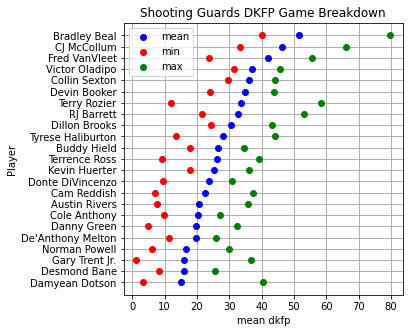

In [145]:
sg_data = data[data['Player'].isin(sg)][['Player','mean','min','max']]
sg_data_sorted = sg_data.sort_values('mean')
plt.plot(sg_data_sorted['mean'],sg_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Shooting Guards DKFP Game Breakdown')
plt.plot(sg_data_sorted['min'],sg_data_sorted['Player'], 'ro')
plt.plot(sg_data_sorted['max'],sg_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig("sg.png",bbox_inches="tight")

In [146]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### SF

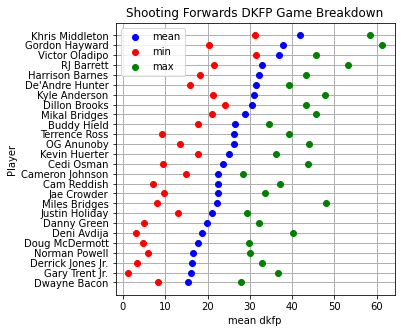

In [147]:
sf_data = data[data['Player'].isin(sf)][['Player','mean','min','max']]
sf_data_sorted = sf_data.sort_values('mean')
plt.plot(sf_data_sorted['mean'],sf_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Shooting Forwards DKFP Game Breakdown')
plt.plot(sf_data_sorted['min'],sf_data_sorted['Player'], 'ro')
plt.plot(sf_data_sorted['max'],sf_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig("sf.png",bbox_inches="tight")

In [148]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### PF

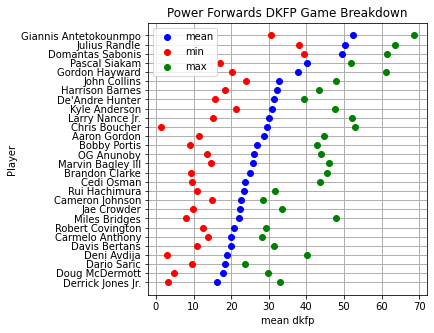

In [149]:
pf_data = data[data['Player'].isin(pf)][['Player','mean','min','max']]
pf_data_sorted = pf_data.sort_values('mean')
plt.plot(pf_data_sorted['mean'],pf_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Power Forwards DKFP Game Breakdown')
plt.plot(pf_data_sorted['min'],pf_data_sorted['Player'], 'ro')
plt.plot(pf_data_sorted['max'],pf_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig("pf.png",bbox_inches="tight")

In [150]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### C

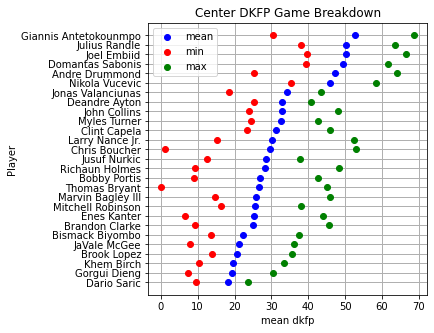

In [151]:
c_data = data[data['Player'].isin(c)][['Player','mean','min','max']]
c_data_sorted = c_data.sort_values('mean')
plt.plot(c_data_sorted['mean'],c_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Center DKFP Game Breakdown')
plt.plot(c_data_sorted['min'],c_data_sorted['Player'], 'ro')
plt.plot(c_data_sorted['max'],c_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig("c.png",bbox_inches="tight")

In [152]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### G

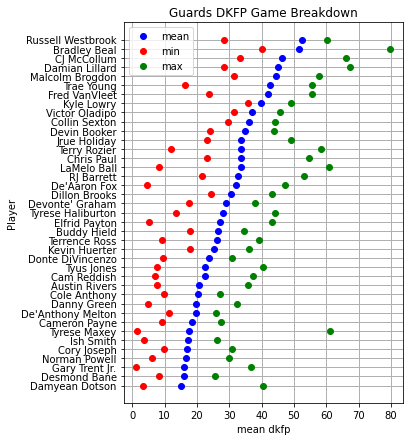

In [153]:
g_data = data[data['Player'].isin(g)][['Player','mean','min','max']]
g_data_sorted = g_data.sort_values('mean')
plt.plot(g_data_sorted['mean'],g_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Guards DKFP Game Breakdown')
plt.plot(g_data_sorted['min'],g_data_sorted['Player'], 'ro')
plt.plot(g_data_sorted['max'],g_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,7)
plt.savefig("g.png",bbox_inches="tight")

In [154]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### F

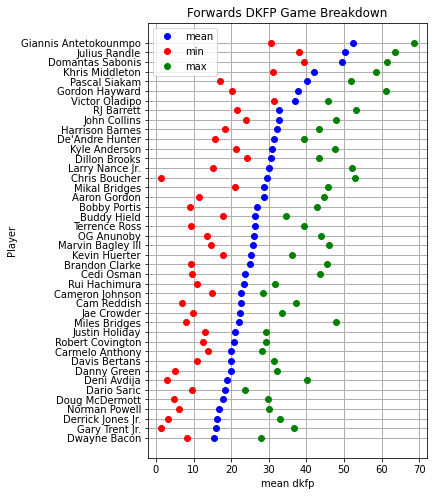

In [155]:
f_data = data[data['Player'].isin(f)][['Player','mean','min','max']]
f_data_sorted = f_data.sort_values('mean')
plt.plot(f_data_sorted['mean'],f_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('Forwards DKFP Game Breakdown')
plt.plot(f_data_sorted['min'],f_data_sorted['Player'], 'ro')
plt.plot(f_data_sorted['max'],f_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,8)
plt.savefig("f.png",bbox_inches="tight")

In [156]:
plt.clf()

<Figure size 432x288 with 0 Axes>

#### UTIL

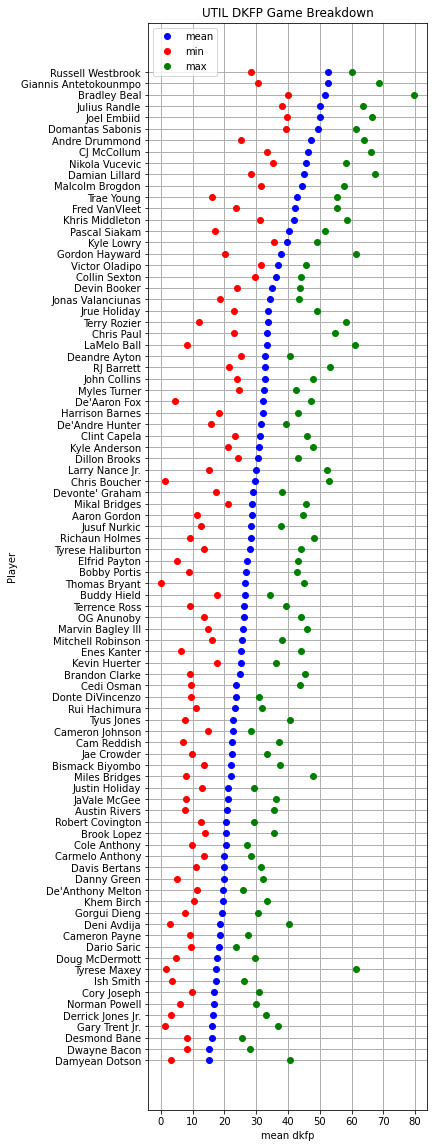

In [157]:
util_data = data[data['Player'].isin(util)][['Player','mean','min','max']]
util_data_sorted = util_data.sort_values('mean')
plt.plot(util_data_sorted['mean'],util_data_sorted['Player'], 'bo')#plot list of x values, list of y values, color and marker style
plt.xlabel('mean dkfp')
plt.ylabel('Player')
plt.title('UTIL DKFP Game Breakdown')
plt.plot(util_data_sorted['min'],util_data_sorted['Player'], 'ro')
plt.plot(util_data_sorted['max'],util_data_sorted['Player'], 'go')
plt.legend(['mean','min','max'])
plt.gca().grid(True, linewidth=1.0, linestyle='-')
fig = plt.gcf()
fig.set_size_inches(5,20)
plt.savefig("util.png",bbox_inches="tight")